# Shopify Data Science Intern Challenge

In [1]:
import pandas as pd

# Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


In [2]:
# load data
order_data = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')
order_data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:16.597
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16.389
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42.228
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18.188


In [3]:
# naive AOV
order_data.order_amount.mean()

3145.128

### Assumptions:

I am going to do my analysis under the assumption that all order amounts are in the same currency

# a.

In [4]:
order_data[['order_amount', 'total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


In [5]:
order_data.order_amount.median()

284.0

Although there is nothing necessarily wrong with the naive calculation, it does not accurately represent what is happening in the data due to extreme outliers. 

Given that the median of the order amounts is far lower than the mean and that the standard deviation is also very high, we can assume that there are some outliers in the data to deal with. We know that the max value is 704000 so we need to look into that.

Some initial thoughts: 

1. Perhaps there are some sneaker boutique shops that sell higher valued shoes that cause the AOV to be higher

2. There may be some extreme outliers that can be removed all together

I will consider these two scenarios to start my investigation:

### Price per shoe

All stores sell a single type of shoe, therefore the store sells one product at a single value

This column may be needed at some point for analysis

In [6]:
order_data['price_per_shoe'] = order_data['order_amount'] / order_data['total_items']

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_shoe
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:16.597,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16.389,117.0
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42.228,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18.188,177.0


### Initial Investigation

<AxesSubplot:>

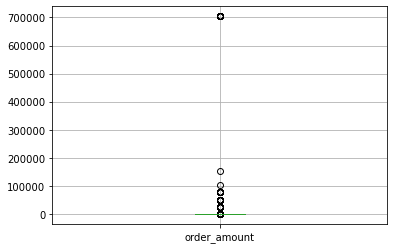

In [7]:
order_data.boxplot('order_amount')

#### significant outliers as seen in the boxplot

## AOV for each store

see if certain stores have abnormal activity

In [8]:
AOV_by_shop = order_data.groupby('shop_id').order_amount.mean().reset_index().sort_values(by=['order_amount'])
AOV_by_shop = AOV_by_shop.rename(columns={"order_amount": "AOV"})

In [9]:
AOV_by_shop.tail() # mean order amounts by store - looking at extremes

,shop_id,AOV
37,38,390.857143
89,90,403.224490
49,50,403.545455
77,78,49213.043478
41,42,235101.490196


Shop's 78 and 42 have abnormally high AOV values - let's investigate

### Shop 42

In [10]:
# shop 42
d3 = order_data[order_data['shop_id'] == 42]

# I notice there are recurring orders all for 2000 items totalling $704000
# further filter for that finding
d3[d3['order_amount'] == 704000].sort_values(by=['created_at'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_shoe
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00,352.0


In [11]:
# look for if other stroes have high order volumes
sorted(order_data.total_items.unique(), reverse = True)

[2000, 8, 6, 5, 4, 3, 2, 1]

Based on the different total item values - store 42's abnormally high total items are an extreme case

Also note that these high order volumes are only from user 607

As seen in store 42's data, there are duplicates for orders of 2000 shoes totaling $704000. This would contribute to the high AOV.

Given that this purchase is made at the same time everyday and sometimes there are multiple purchases of the same size and value from the same user at the same time each day, we can assume these are most likely automated purchases by a bot, perhaps for reselling purposes.

Some of these duplicates are the exact same data (placed on same day at the exact same time). To me, this seems like a POS error, but it could also be that there is a 2000 item limit so this automated process may make multiple transactions to bypass it (just a theory). Since I am unsure of the context, I will leave them and assume that these are intentional purchases. 

### Shop 78

In [12]:
order_data[order_data['shop_id'] == 78].head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_shoe
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:18.911,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35.400,25725.0
511,512,78,967,51450,2,cash,2017-03-09 07:23:13.640,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:41.848,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43.203,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:44.830,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:25.551,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:19.843,25725.0


In the case of store 78, which also has a high AOV, we see that all of their orders are very high since they have a high price per shoe dollar value. This could be because they are a boutique sneaker shop and that is their actual selling price OR there could be a decimal error, currency difference etc.

Given the limited information for the problem, I am going to proceed with the fact that this is a boutique sneaker shop with high value sneakers and these are valid orders. 

After seeing these few outliers and exceptions the rest of the AOV's seem to be reasonable values of <$500

## Let's explore what it would look like not having user 607 and shop 78

In [13]:
order_data_alt = order_data[(order_data['user_id'] != 607) & (order_data['shop_id'] != 78)]

order_data_alt.order_amount.mean()

302.58051448247926

This is a much more reasonable value, however, I believe that orders from shop 78 are valid even though they have a higher selling price. User 607 is also making valid purcahses even though they are suspicious. Therefore, we should find a metric that does not omit them all together.

## b. 

The metrics I would like to use are either **median** or **AOV by store**

<br>

**Median** is more robust than mean when data has outliers so it is a viable option

<br>

**BUT**

<br>

By doing **AOV by store** we get a more accurate picture of what is going on: 

For example, perhaps we no longer want to categorize store 78 as a sneaker shop if it does not follow typical sneaker shop behaviour but rather find a more suitable category (reseller, collectables, etc).

This would also accomodate user 607's purchasing behaviour from store 42 as this seems to be the norm for store 42

## c.

#### Median 

In [95]:
order_data.order_amount.median()

284.0

#### AOV by shop

In [101]:
AOV_by_shop

,shop_id,AOV
91,92,162.857143
1,2,174.327273
31,32,189.976190
99,100,213.675000
52,53,214.117647
...,...,...
37,38,390.857143
89,90,403.224490
49,50,403.545455
77,78,49213.043478


# Question 2

## a. 

SELECT Orders.ShipperID, COUNT(Orders.OrderID)<br>
FROM Orders, Shippers<br>
WHERE Orders.ShipperID = Shippers.ShipperID AND Shippers.ShipperName = 'Speedy Express'<br>
GROUP BY Orders.ShipperID<br>

**Result: 54**

## b.

SELECT COUNT(Orders.OrderID), Employees.LastName<br>
FROM Orders, Employees<br>
WHERE Orders.EmployeeID = Employees.EmployeeID<br>
GROUP BY Employees.LastName<br>
ORDER BY COUNT(Orders.OrderID) DESC<br>

result: Peacock (40 orders)

## c.

SELECT Products.ProductName, Customers.Country, Products.ProductName, SUM(OrderDetails.Quantity)<br>
FROM Products, OrderDetails, Orders, Customers<br>
WHERE Products.ProductID = OrderDetails.ProductID AND OrderDetails.OrderID = Orders.OrderID AND Orders.CustomerID = Customers.CustomerID AND Country = 'Germany'<br>
GROUP BY Products.ProductName, Customers.Country<br>
ORDER BY SUM(OrderDetails.Quantity) DESC<br>

**Result: Boston Crab Meat (160 orders)**